# Limitaciones de la computadora

En la clase pasada revisamos los tipos de datos numéricos que soporta `python`. En particular `float`,   `integer` y `complex`. Pero todos ellos, al ser expresados en la computadora, pierden algunas de sus propiedades matemáticas *puras*, por así decirlo.

Matemáticamente los **enteros** (`integers`) son un conjunto *infinito*  $ \mathbb{N} =\{1,2,3,\ldots\}$. La computadora es de tamaño *finito*, por lo cual es imposible representar todos esos números en la computadora. El tipo `int` se representa en 4-bytes, es decir en $32$ bits. (**Ejercicio**: ¿Por qué?). El número máximo (a nivel CPU) está dado por $2^{32}$.

In [11]:
#Número máximo
maximo =2**1000001+1
#maximo

Pero ya que queremos representar tanto los positivos como los negativos:

In [3]:
print("Rango numeros que puedo representar")
[-2**64/2-1, 2**64/2-1] 

Rango numeros que puedo representar


[-9.223372036854776e+18, 9.223372036854776e+18]

El valor exacto del límite superior en tu computadora lo puedes obtener mediante:

In [4]:
import sys
sys.maxsize

9223372036854775807

¿Por qué crees que es diferente? ¿Tiene que ver con la arquitectura de tu **CPU**? ¿Es de $64$ bits? ¿Entonces cuántos bytes se ocupan para representar un entero?

<div class="alert alert-info">
**Ejercicio**: En python, para obtener la representación de un número en binario usamos la función `bin`
</div>

In [5]:
bin(123)

'0b1111011'

In [6]:
print?

Genera una tabla del 0 al 255 con su representación en binario y en decimal. Observa como usamos el `print` para formatear el texto de salida. Usa la ayuda de ipython para entender que hacen los símbolos `%d` y `%s`.  ¿Cuántos caracteres necesitas?

In [7]:
for i in range(-5,5):
    print("%d \t %s" % (i, bin(i)))

-5 	 -0b101
-4 	 -0b100
-3 	 -0b11
-2 	 -0b10
-1 	 -0b1
0 	 0b0
1 	 0b1
2 	 0b10
3 	 0b11
4 	 0b100


El mismo problema de *finitud* se presenta con los flotantes (que tratan de emular a los reales, $\mathbb{R}$). 

Recordemos primero ( de sus clases de Cálculo), que cualquier número real $x$, puede ser escrito en términos una *mantisa* y un *exponente* de la siguiente manera $$x = a \cdot 10^b$$

Piensa en esto, cualquier número real, se puede representar con dos números enteros...

Si tu **CPU** es de $32$ bits, se utilizan $8$ bytes para guardar un flotante (ya que $2 \cdot 4$) , si es de $64$ bits se utilizan $16$ bytes.

El estándar **IEEE-754** para el caso de $64$ bits, divide los bits como sigue
- 1 bit para el signo
- 11 bits para el exponente $b$
- 52 bits para la mantisa $a$

<div class="alert alert-info">
**Ejercicio** ¿Cuál es el número flotante más grande y más pequeño que se puede representar?
</div>

<div class="alert alert-info">
**Ejercicio** ¿Cuántos bytes se requieren para representar un número complejo $\mathbb{C}$? ¿En 32 y en 64 bits?¿Cuáles serán sus limitaciones?
</div>

El siguiente es un error común (observa la demostración en el pizarrón) :

In [ ]:
#x = 0.0
#while not x == 1.0:
#    x = x + 0.1
#    print("x=%19.17g" % (x))
        #Eso dará una cola de nueves y nunca terminará por la precision

In [8]:
#from paquete import funcion
#import pandas
    #pandas.funcion
#import pandas as pd
    #pd.funcion
#from pandas import *
    #funcion

La salida de los primeros 15 es la siguiente:

In [9]:
x = 0.0
for i in range(0,15):
    x = x + 0.1
    print("x=%19.17g" % (x))
#Nunca llega al 1.0 exacto por la precision

x=0.10000000000000001
x=0.20000000000000001
x=0.30000000000000004
x=0.40000000000000002
x=                0.5
x=0.59999999999999998
x=0.69999999999999996
x=0.79999999999999993
x=0.89999999999999991
x=0.99999999999999989
x= 1.0999999999999999
x=                1.2
x=                1.3
x= 1.4000000000000001
x= 1.5000000000000002


**Ejercicio**:¿Qué enseñanza puedes sacar de esto?

Existe una manera (entre varias) de resolver el problema:

In [10]:
x = 0.0
while abs(x-1.0) > 1e-8: #Ocupar un numero mas chico que tu precision
    x = x + 0.1
    print ("x=%19.17g" % (x))
    
#Siempre hay un error al trabajar con la computadora

x=0.10000000000000001
x=0.20000000000000001
x=0.30000000000000004
x=0.40000000000000002
x=                0.5
x=0.59999999999999998
x=0.69999999999999996
x=0.79999999999999993
x=0.89999999999999991
x=0.99999999999999989


**Ejercicio:** Explica el código.

# Cálculo simbólico

Es posible realizar cálculo simbólico en python (justo como en **Mathematica** o **Maple**) usando el paquete `sympy`. El código siguiente es para imprimir a $\LaTeX$ la salida de las instrucciones.

In [11]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

En las celdas que siguen, observa el diferente uso de `import` y `from` ¿Cuál es su función? 

In [12]:
from sympy import Symbol
x = Symbol('x')

In [13]:
x

In [14]:
type(x)

sympy.core.symbol.Symbol

In [15]:
y = Symbol('y')

In [16]:
2*x - x

In [17]:
x +y +x  - 10*y*x

In [18]:
import sympy as sym
x,y,z = sym.symbols('x,y,z')
x + 2*y + 3*z -x

`Sympy` también puede representar tipos numéricos: `Rational` y `Real`

In [19]:
a = sym.Rational(1,10)
a

In [22]:
b = sym.Rational(45,67)
b

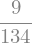

In [23]:
c = a*b
c

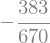

In [24]:
d = a-b
d

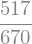

In [25]:
e = a+b
e

In [26]:
float(c)

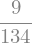

In [27]:
c

Es posible usar el siguiente método para indicarle a python cuántos decimales calcular (aunque no necesariamente se van a usar todos al guardarlo en memoria).

In [28]:
c.evalf()

In [29]:
c.evalf(30) #Indicar cuantos decimmales usar y evalua 

In [30]:
from sympy import *

In [31]:
diff(sin(x), x)

In [32]:
diff(sin(x), y)

In [33]:
diff(10+3*x+4*x**2+45*x*y, x)

In [34]:
diff(10+3*x+4*x**2+45*x*y, x).subs(x, 1) #Sustituye despues de derivar

In [35]:
diff(10+3*x+4*x**2+45*x*y, x,y)

In [36]:
diff(10+3*x+4*x**2+45*x*y, x,x)

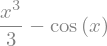

In [37]:
integrate(x**2 + sin(x), x)

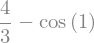

In [38]:
integrate(x**2 + sin(x), (x, 0, 1)) #Integral definida

<div class="alert alert-info">
**Ejercicio:** Resuelva simbólicamente lo siguiente: Se lanza una pelota al aire con una velocidad $v_0$ a un ángulo $\theta$. La gravedad es $g$. 
- ¿Cuál es la altura máxima? 
- ¿Cuál es la distancia máxima?
- ¿Cuál es el tiempo de vuelo?
- De una respuesta numérica, cuando $v_0 = 10 \frac{m}{s}$ y $\theta=\pi/4$.
</div>

In [39]:
from sympy.interactive import printing #Lineas para usar latex
printing.init_printing(use_latex=True)
from sympy import *
h,R,t,theta,g,v0=symbols('h,R,t,theta,g,v0')
h=(v0**2)*sin(theta)**2/(2*g)
R=(v0**2)*sin(2*theta)/(g)
t=(2*v0)*sin(theta)/(g)


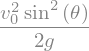

In [40]:
h


In [41]:
h.subs([(v0,10),(theta,pi/4),(g,9.8)])

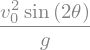

In [42]:
R


In [43]:
R.subs([(v0,10),(theta,pi/4),(g,9.8)])

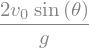

In [44]:
t

In [45]:
t.subs([(v0,10),(theta,pi/4),(g,9.8)])

Diff requiere donde evaluar y derivative para obtener la derivada abstracta

`Sympy` también permite resolver ecuaciones diferenciales ordinarias (**ODE**, en inglés), usando la función `dsolve`. 

In [46]:
dsolve?

In [47]:
Function?

In [48]:
Derivative?

In [49]:
y = Function('y')
x = Symbol('x')
y_ = Derivative(y(x), x)

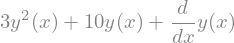

In [50]:
ode = y_ + 10*y(x) + 3*y(x)**2
ode

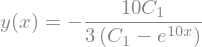

In [51]:
sol = dsolve(ode, y(x))
sol

In [52]:
type(sol)

sympy.core.relational.Equality

<div class="alert alert-danger">
Que el tipo sea `Equality` será muy importante cuando querrámos graficar. Manten este hecho en mente.
</div>

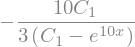

In [53]:
sol.rhs #ya no nos da una igualdad (equivalencia) r--> right hand side      l--> left hand side

<div class="alert alert-info">
**Ejercicio** 
- Demuestra que $y_1 = e^t$ y $y_2 = t e^t$ son soluciones de la **ODE** $y^{''} -2y^{'} + y = 0$. No uses `dsolve`. Recuerda que tienes que definir los *símbolos* $y$ y $t$.
- Ahora resuelve usando `dsolve`. Recuerda definir la función.
</div>

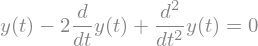

In [54]:
from sympy.interactive import printing #Lineas para usar latex
printing.init_printing(use_latex=True)
from sympy import *

y = Function('y')
t = Symbol('t')
y1 = Function('y1')
y2 = Function('y2')

y1=exp(t)
y2=t*exp(t)
ecuacion = Eq(Derivative(y(t),t,t)-2*Derivative(y(t),t)+y(t),0)
ecuacion

In [55]:
y1

In [56]:
y2

In [57]:
solucion= dsolve(ecuacion)
solucion

In [58]:
part1=Eq(y1,solucion.rhs)
part1

In [59]:
part2=Eq(y2,solucion.rhs)
part2

In [60]:
solve(part1)

In [61]:
solve(part2)

Regularmente al resolver problemas científicos es necesario utilizar aproximaciones en forma de series. `Sympy` también puede hacerlas.

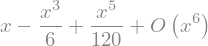

In [62]:
sin(x).series(x,0)

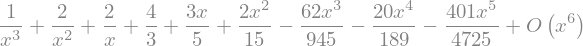

In [63]:
(exp(x)**2*cos(x)/sin(x)**3).series(x,0)

Por último ¿Recuerdas el problema con los flotantes? Pues con `Sympy` se puede resolver.

In [64]:
dx = Rational(1,10)
dx

In [65]:
x = 0

In [66]:
while x != 1.0:
    x = x+dx
    print("x=%4s = %3.1f" % (x, x.evalf()))

x=1/10 = 0.1
x= 1/5 = 0.2
x=3/10 = 0.3
x= 2/5 = 0.4
x= 1/2 = 0.5
x= 3/5 = 0.6
x=7/10 = 0.7
x= 4/5 = 0.8
x=9/10 = 0.9
x=   1 = 1.0


Pero hacer estos cálculos de manera simbólica es mucho más lento que hacerlo de forma numerica:

In [67]:
dx_symbolic = Rational(1,10)

def bucle_sympy(n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

In [68]:
dx = 0.1
def bucle_float(n):
    x = 0
    for i in range(n):
        x = x + dx
    return x

In [69]:
n = 100000

In [70]:
%timeit bucle_sympy(n)

2.18 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%timeit bucle_float(n)
#Es mil veces mas rapidos usar floats que simbolos

12.1 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
